In [1]:
import sys
sys.path.append("../")

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from core import *
from sir import f
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.gaussian_process import GaussianProcessRegressor
from scipy.stats import multivariate_normal

In [6]:
plt.rcParams.update({'font.size': 14})
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the func and res

In [7]:
f_grids = np.load('true_funcs/2d.npy') 
res = np.load('results/res_t.npy', allow_pickle=True)

## Plot input, output, and error

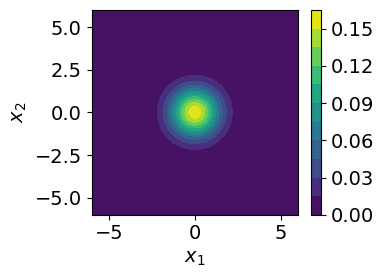

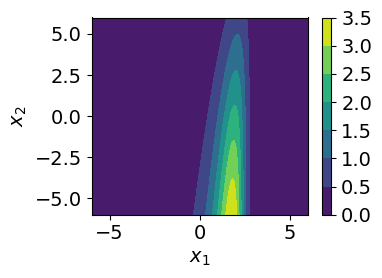

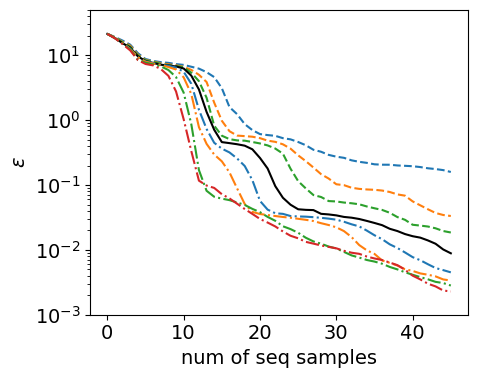

In [8]:
#input figure 
plt.figure(figsize=(4,3))
x = np.linspace(-6, 6, 500)
y = np.linspace(-6, 6, 500)
meshx, meshy = np.meshgrid(x,y)
grids = np.concatenate([mesh.reshape(-1, 1) for mesh in [meshx, meshy]], axis=1)
ax1 = plt.gca()
temp = ax1.contourf(meshx, meshy, 
                    multivariate_normal.pdf(grids, np.zeros(2), np.eye(2)).reshape(meshx.shape), levels=10)
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
plt.colorbar(temp, ax=ax1)
plt.tight_layout()
plt.savefig('plots/input.pdf')
plt.show()


# output fiugre 
plt.figure(figsize=(4,3))
levels = np.arange(0, 3.6, 0.5)
x = np.linspace(-6, 6, 121)
y = np.linspace(-6, 6, 121)
meshx, meshy = np.meshgrid(x,y)
meshf = f_grids.reshape(meshx.shape)
ax1 = plt.gca()
temp = ax1.contourf(meshx, meshy, meshf, levels=levels)
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
#ax1.set_title('(a)')
# add colorbar
plt.colorbar(temp, ax=ax1)
plt.tight_layout()
plt.savefig('plots/output.pdf')
plt.show()

# res figure 
plt.figure(figsize=(5,4))
labels = [0.6, 0.8, 0.9, 1, 1.1, 1.2, 1.4, 1.6]
colors = ['tab:blue', 'tab:orange', 'tab:green', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red']
linstyles = ['dashed', 'dashed', 'dashed', 'solid', 'dashdot', 'dashdot', 'dashdot', 'dashdot']

x = np.arange(len(res[0][0][1]))
y_list = np.array([[res[i][j][1] for i in range(len(res))] for j in range(len(labels))])

ax2 = plt.gca()
for i in range(8):
    ax2.plot(x, np.mean(y_list[i], axis=0), color=colors[i], 
             linestyle=linstyles[i])

ax2.set_yscale('log')
ax2.set_ylim(1 * 1e-3, 5 * 1e1)
ax2.set_xlabel('num of seq samples')
ax2.set_ylabel('$\epsilon$')
plt.tight_layout()
plt.savefig('plots/res.pdf')

In [9]:
# Plot the sampling position 
kernel = C(0.25, 'fixed') * RBF((0.5, 10), 'fixed')
gpr = GaussianProcessRegressor(kernel=kernel)

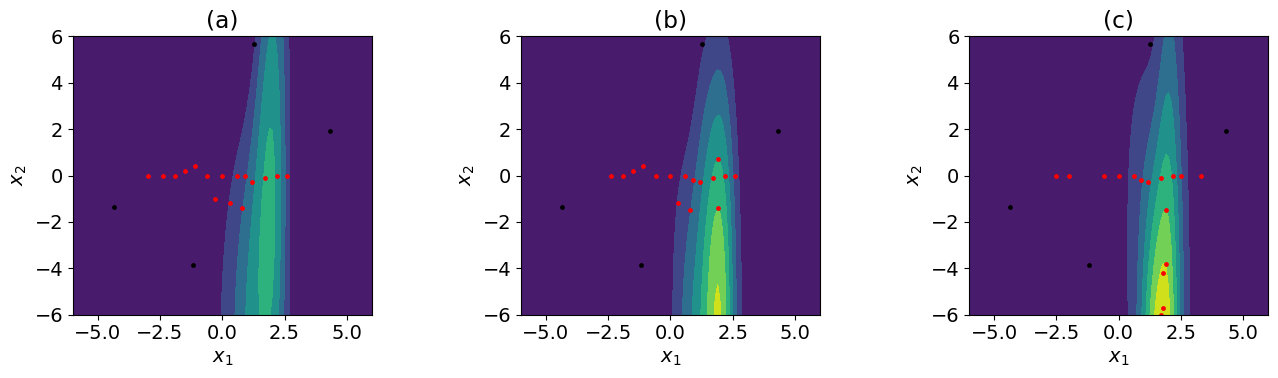

In [12]:
# Plot the sampling position 
kernel = C(0.25, 'fixed') * RBF((0.5, 10), 'fixed')
gpr = GaussianProcessRegressor(kernel=kernel)

seed = 0
num_plot = 20
x = np.linspace(-6, 6, 121)
y = np.linspace(-6, 6, 121)
meshx, meshy = np.meshgrid(x,y)


fig, axes = plt.subplots(1, 3, figsize=(13, 4))
ax1, ax2, ax3 = axes

title_list = ('(a)', '(b)', '(c)')
case_list = (0, 3, 6)
for i in range(3):
    meshf = gpr.fit(res[seed][case_list[i]][0][:num_plot], 
                    f(res[seed][case_list[i]][0][:num_plot])).predict(np.c_[meshx.ravel(), meshy.ravel()]).reshape(meshx.shape)
    axes[i].contourf(meshx, meshy, np.where(meshf < 0, 0, meshf), levels=levels)
    axes[i].scatter(res[seed][case_list[i]][0][:4,0], 
                    res[seed][case_list[i]][0][:4,1],
                    color='k', s=6)
    axes[i].scatter(res[seed][case_list[i]][0][4:20,0], 
                    res[seed][case_list[i]][0][4:20,1],
                    color='red', s=6)
    axes[i].set_xlabel('$x_1$')
    axes[i].set_ylabel('$x_2$')
    axes[i].set_title(title_list[i])
plt.tight_layout()
plt.subplots_adjust(wspace=0.5)
plt.savefig('plots/samples.pdf')
plt.show()